In [1]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# import libraries

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import spacy
import nltk
import re
import string
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [33]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# import pre-processed reviews and labels

# Reviews
reviews  = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/Natural-Language-Processing-main/Sentimental analysis Project/Data/Pre-Processed.csv')
reviews.drop(['Unnamed: 0'],axis=1,inplace=True)

# Labels
labels = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/Natural-Language-Processing-main/Sentimental analysis Project/Data/Amazon_Customer_Reviews.csv')

In [6]:
data = pd.concat([reviews,labels['Ratings']],axis=1)

In [7]:
data

,Reviews,Ratings
0,use amazon com often 99 percent time excellent...,Good
1,amazon leisurely shop comfort home anything am...,Good
2,happy purchase since shopping amazon website n...,Good
3,absolutely love amazon selection price notific...,Good
4,shopped amazon year always find pleasure deal ...,Good
...,...,...
6616,purchased canon pro 9500 mark ii printer amazo...,Bad
6617,paid payment vehicle get inspect/ test drive v...,Good
6618,le one star little way cancel anything place o...,Bad
6619,started selling amazon month ago hard get item...,Good


<h3> Number of Reviews in each type of ratings

In [15]:
data.Ratings.value_counts()

Bad     4654
Good    1967
Name: Ratings, dtype: int64

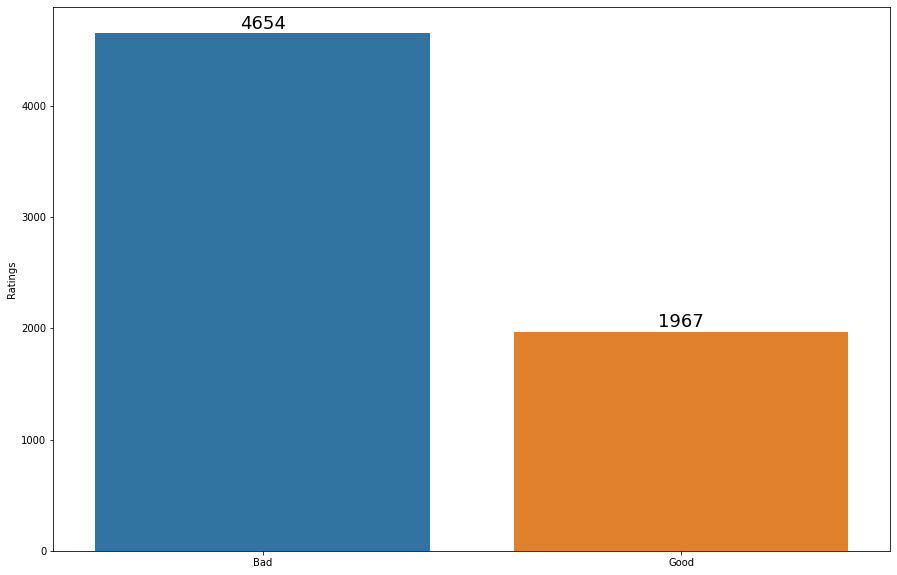

In [20]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=['Bad','Good'],y = data.Ratings.value_counts())

rects = ax.patches
labels = data.Ratings.value_counts()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

<h3 >Term Frequency

In [23]:
stops =  set(stopwords.words('english'))
co = CountVectorizer( stop_words=stops)
counts = co.fit_transform(data.Reviews)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
amazon,19077
item,6277
customer,5799
order,5423
day,4939
service,4566
time,4460
get,3882
review,3746
prime,3745


**In the single term frequency analysis, some of the words such as good, issue, problem,  etc are seen frequently occuring**

In [28]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(data.Reviews)
bi_gram=pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)
bi_gram

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
customer service,3081
read full,1897
full review,1896
amazon prime,1118
amazon com,1104
credit card,762
prime member,674
amazon customer,672
gift card,588
prime membership,574


In [27]:
co = CountVectorizer(ngram_range=(3,3),stop_words=stops)
counts = co.fit_transform(data.Reviews)
tri_gram=pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)
tri_gram

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
read full review,1895
amazon customer service,461
called customer service,191
customer service rep,165
amazon prime member,162
third party seller,144
two day shipping,138
amazon read full,132
contacted customer service,110
get money back,104


**From Bi-gram and Tri-gram analysis, it seems that reviews are more about customer services.**

<h3> Comment length distribution

count    6621.000000
mean       77.426824
std        74.526266
min         7.000000
25%        33.000000
50%        56.000000
75%        95.000000
max      1397.000000
Name: Reviews, dtype: float64


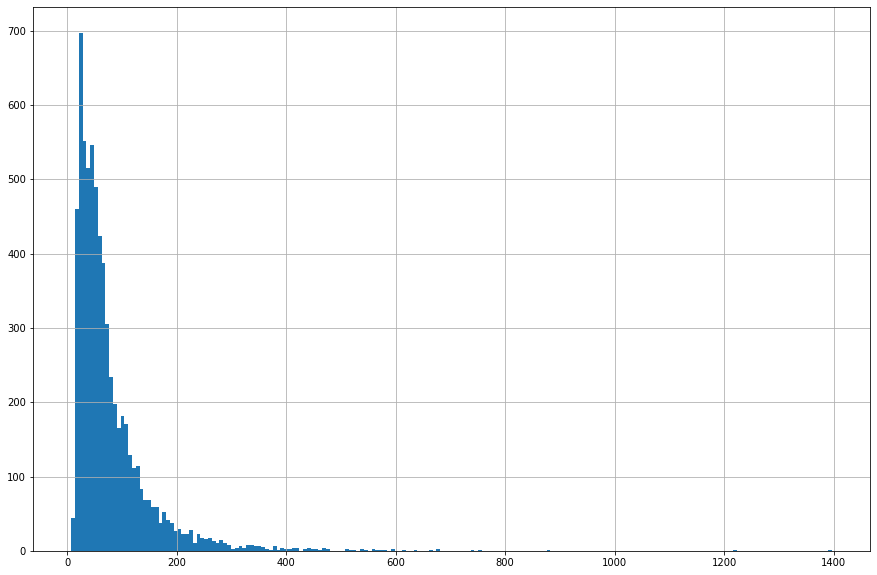

In [30]:
lens = data.Reviews.str.split().apply(lambda x: len(x))
print(lens.describe())

plt.figure(figsize=(15, 10))
lens.hist(bins=200)
plt.show()

* Mean length of review is 77 words.
* Distribution is positively skewed.

<h3> Word Cloud

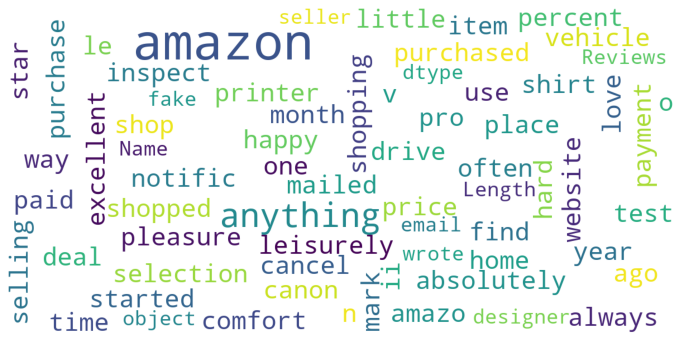

In [32]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=3,
        random_state=1)
   
wordcloud=wordcloud.generate(str(data.Reviews))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

**Some of the sentimental words such as love, happy, fake, pleasure, etc can be seen in word cloud.**




